In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import community
import collections
import community_layout

In [74]:
G = nx.read_weighted_edgelist("./data/InvInvPairs_UND.csv", delimiter = '\t')

max degree 723


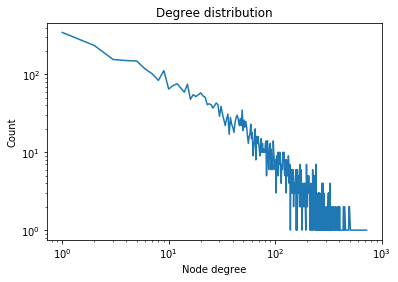

In [75]:
## degree distribution
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
degreeCount = collections.Counter(degree_sequence)
print("max degree", max(degreeCount))
deg, cnt = zip(*degreeCount.items())
plt.plot(deg, cnt)
plt.yscale('log')
plt.xscale('log')
plt.xlabel("Node degree")
plt.ylabel("Count")
plt.title("Degree distribution")
plt.show()

In [76]:
## Louvain partitioning
partition = community.best_partition(G, randomize=None)
size = float(len(set(partition.values())))
print("# community", size)
print("modularity", community.modularity(partition, G))

# community 24.0
modularity 0.31748324699405317


Community size [1236, 403, 199, 323, 851, 486, 127, 192, 476, 34, 58, 79, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3]


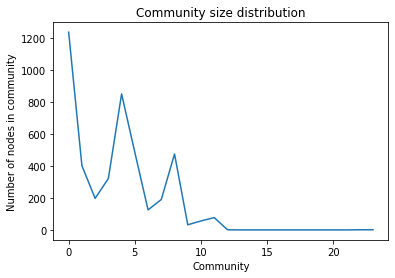

In [77]:
## print communities
df_invstors = pd.read_csv('./data/Investor.csv', header=None, sep = '\t')
communities = {}
comm_size_list = []
for com in set(partition.values()):
    list_nodes = [n for n in partition.keys() if partition[n] == com]
    communities[com] = list_nodes
    comm_size_list.append(len(list_nodes))
    #print("#######community %i size %i" % (com, len(list_nodes)))
    #for n in list_nodes:
    #    print("%s %s" % (n, df_invstors[1][int(n)]))
print("Community size", comm_size_list)
plt.plot(np.arange(size), comm_size_list)
plt.xlabel("Community")
plt.ylabel("Number of nodes in community")
plt.title("Community size distribution")
plt.show()

In [78]:
#Remove communities less than 5 nodes
for com in set(partition.values()):
    if len(communities[com]) < 5:
        for node in communities[com]:
            G.remove_node(node)

In [79]:
## Perform Louvain partitioning again
partition = community.best_partition(G, randomize=None)
size = float(len(set(partition.values())))
print("# community", size)
print("modularity", community.modularity(partition, G))

# community 12.0
modularity 0.3154991973970844


Community size [1268, 595, 208, 204, 514, 118, 320, 162, 782, 152, 60, 81]


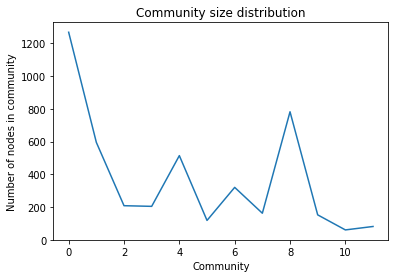

In [80]:
## print communities again
df_invstors = pd.read_csv('./data/Investor.csv', header=None, sep = '\t')
communities = {}
comm_size_list = []
for com in set(partition.values()):
    list_nodes = [n for n in partition.keys() if partition[n] == com]
    communities[com] = list_nodes
    comm_size_list.append(len(list_nodes))
print("Community size", comm_size_list)
plt.plot(np.arange(size), comm_size_list)
plt.xlabel("Community")
plt.ylabel("Number of nodes in community")
plt.title("Community size distribution")
plt.show()

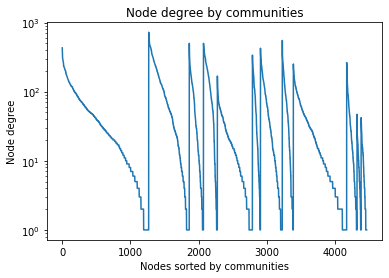

/home/ann/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:563: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/home/ann/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: 
The is_numlike function was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use isinstance(..., numbers.Number) instead.
  if cb.is_numlike(alpha):


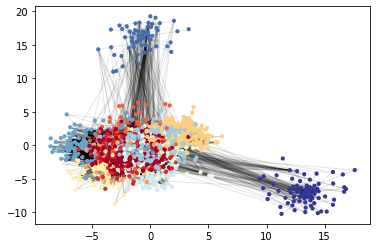

In [81]:
## plot

# plot degree of nodes in communities
deg_list = []
for com in set(partition.values()):
    nodes = [n for n in partition.keys() if partition[n] == com]
    deg_list.extend(sorted(G.degree(nodes), key=lambda x: x[1], reverse=True))
deg_list = list(map(lambda x: x[1], deg_list))
plt.plot(deg_list)
plt.yscale("log")
plt.xlabel("Nodes sorted by communities")
plt.ylabel("Node degree")
plt.title("Node degree by communities")
plt.show()

# draw graph
# pos = nx.spring_layout(G)
pos = community_layout.community_layout(G, partition)
# pos = community_layout._position_communities(G, partition)

nx.draw_networkx_nodes(G, pos, node_size = 10, cmap=plt.cm.RdYlBu, node_color=list(partition.values()))
nx.draw_networkx_edges(G, pos, alpha=0.1)
plt.show()

In [86]:
df_investors = pd.read_csv('./data/Investor.csv', header=None, sep = '\t')
df_investors = df_investors.rename(columns = {0:'investorID', 1:'investorname'})
valueinvestor = pd.read_csv('./data/valueinvestorname.txt', names = {'investorname'})
valueinvestor = valueinvestor.append(df_investors[df_investors['investorname'].str.contains('VALUE')][['investorname']], ignore_index = True)
valueinvestor = valueinvestor.merge(df_investors, on = ['investorname'], how = 'left')
valueinvestor = valueinvestor[valueinvestor.investorID.notnull()]
valueinvestor = valueinvestor.drop_duplicates()
valueinvestor = valueinvestor.astype({'investorID':'uint16'})
valueinvestor['com'] = -1
valueinvestor['deg'] = 0
valueinvestor

for ID in valueinvestor.investorID:
    if str(ID) in partition:
        index = valueinvestor[valueinvestor['investorID'] == ID].index[0]
        valueinvestor['com'][index] = partition[str(ID)]
        valueinvestor['deg'][index] = G.degree(str(ID))

/home/ann/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/home/ann/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


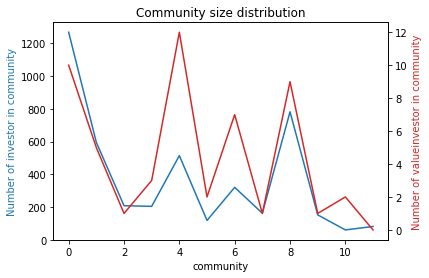

com
-1     12
 0     10
 1      5
 2      1
 3      3
 4     12
 5      2
 6      7
 7      1
 8      9
 9      1
 10     2
dtype: int64
com
-1       0.000000
 0      47.500000
 1     170.400000
 2     405.000000
 3     122.666667
 4      43.250000
 5     179.000000
 6      49.571429
 7      76.000000
 8      33.444444
 9       3.000000
 10     19.000000
Name: deg, dtype: float64


,investorname,investorID,com,deg
72,VALUEINVEST ASSET MANAGEMENT SA,5428,-1,0
4,PERKINS INVESTMENT MANAGEMENT LLC,3995,-1,0
24,MERION INVESTMENT MANAGEMENT LP,3358,-1,0
64,SPRINGBANK VALUE PARTNERS LP,4862,-1,0
46,CEREDEX VALUE ADVISORS LLC,1074,-1,0
68,VALUE HOLDINGS LP,5424,-1,0
11,ARTISAN PARTNERS LIMITED PARTNERSHIP,383,-1,0
43,GREENWOOD CAPITAL ASSOCIATES LLC,2272,-1,0
41,RV CAPITAL GMBH,4467,-1,0
56,LONE STAR VALUE MANAGEMENT LLC,3120,-1,0


In [87]:
valuecomm_size_list = []
for i in range(int(size)):
    if i in valueinvestor.groupby('com').size():
        valuecomm_size_list += [valueinvestor.groupby('com').size()[i]]
    else:
        valuecomm_size_list += [0]
valuecomm_size_list
fig, ax1 = plt.subplots()
color = 'tab:blue'
ax1.set_xlabel('community')
ax1.set_ylabel("Number of investor in community", color = color)
ax1.plot(np.arange(size), comm_size_list, color = color)
color = 'tab:red'
ax2 = ax1.twinx()
ax2.set_ylabel("Number of valueinvestor in community", color = color)
ax2.plot(np.arange(size), valuecomm_size_list, color = color)
plt.title("Community size distribution")
plt.show()
print(valueinvestor.groupby('com').size())
print(valueinvestor.groupby('com').mean()['deg'])
valueinvestor.sort_values('com')

In [88]:
df_investors[df_investors['investorname'].str.contains('VALUE')]

,investorID,investorname
362,362,ARLINGTON VALUE CAPITAL LLC
1074,1074,CEREDEX VALUE ADVISORS LLC
1118,1118,CHEVIOT VALUE MANAGEMENT LLC
1500,1500,DECCAN VALUE INVESTORS LP
1559,1559,DISCOVERY VALUE FUND
1596,1596,DREMAN VALUE MANAGEMENT L L C
1895,1895,FIREFLY VALUE PARTNERS LP
2413,2413,HEALTHCARE VALUE CAPITAL LLC
2658,2658,INTERNATIONAL VALUE ADVISERS LLC
3074,3074,LIMESTONE VALUE PARTNERS LLC


In [89]:
df_partition = pd.DataFrame.from_dict(list(partition.items()))
df_partition = df_partition.rename(columns={0:'investorID',1:'community'})
df_partition.to_csv("./data/df_partition.csv", header=True, index=False, sep="\t")